In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import warnings 
warnings.filterwarnings('ignore')

In [156]:
df = pd.read_csv('spam.csv', encoding ='latin1')

# Data Cleaning

Data cleaning is an essential step in the data preparation process. It involves handling missing values, removing duplicates, and correcting any inconsistencies in the dataset. For the Email Spam classification problem, we will perform the following data cleaning steps:

1. **Handling Missing Values**:
   - Check for and handle any missing values in the dataset.

2. **Removing Duplicates**:
   - Identify and remove duplicate entries to ensure the dataset is clean and accurate.

3. **Correcting Inconsistencies**:
   - Ensure that all text data is in a consistent format (e.g., all lower case) to facilitate further text processing steps.
   
Let's begin with these steps in detail.













In [157]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [158]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [160]:
df.shape

(5572, 2)

In [161]:
df.duplicated().sum()

403

In [162]:
df = df.drop_duplicates()

In [163]:
df.duplicated().sum()

0

In [164]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [165]:
df.shape

(5169, 2)

In [166]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [167]:
df = df.rename(columns={'v1': 'Category', 'v2': 'Message'})

In [168]:
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1


In [169]:
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [170]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

# Exploratory Data Analysis

In [171]:
df['Category'].value_counts()

Category
1    4516
0     653
Name: count, dtype: int64

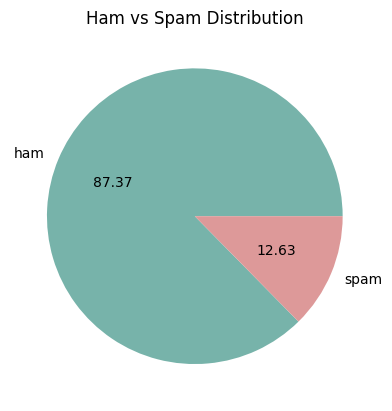

In [172]:
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct = '%0.2f', colors=['#77b3aa','#dd9999'])
plt.title("Ham vs Spam Distribution")
plt.show()

In [173]:
import nltk

In [174]:
df['character_count'] = df['Message'].apply(len)

In [175]:
df.head(3)

,Category,Message,character_count
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [176]:
df['word_counts'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [177]:
df.head(3)

,Category,Message,character_count,word_counts
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [178]:
df['Sentence_counts'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [179]:
df.head(3)

,Category,Message,character_count,word_counts,Sentence_counts
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [180]:
df.describe()

,character_count,word_counts,Sentence_counts
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [181]:
# Deccriptive Statistical View of Spam Emails
df[df['Category'] == 0][['character_count', 'word_counts', 'Sentence_counts']].describe()

,character_count,word_counts,Sentence_counts
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [182]:
# Deccriptive Statistical View of Ham Emails
df[df['Category'] == 1][['character_count', 'word_counts', 'Sentence_counts']].describe()

,character_count,word_counts,Sentence_counts
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


# Data Visualization

<Axes: xlabel='character_count', ylabel='Count'>

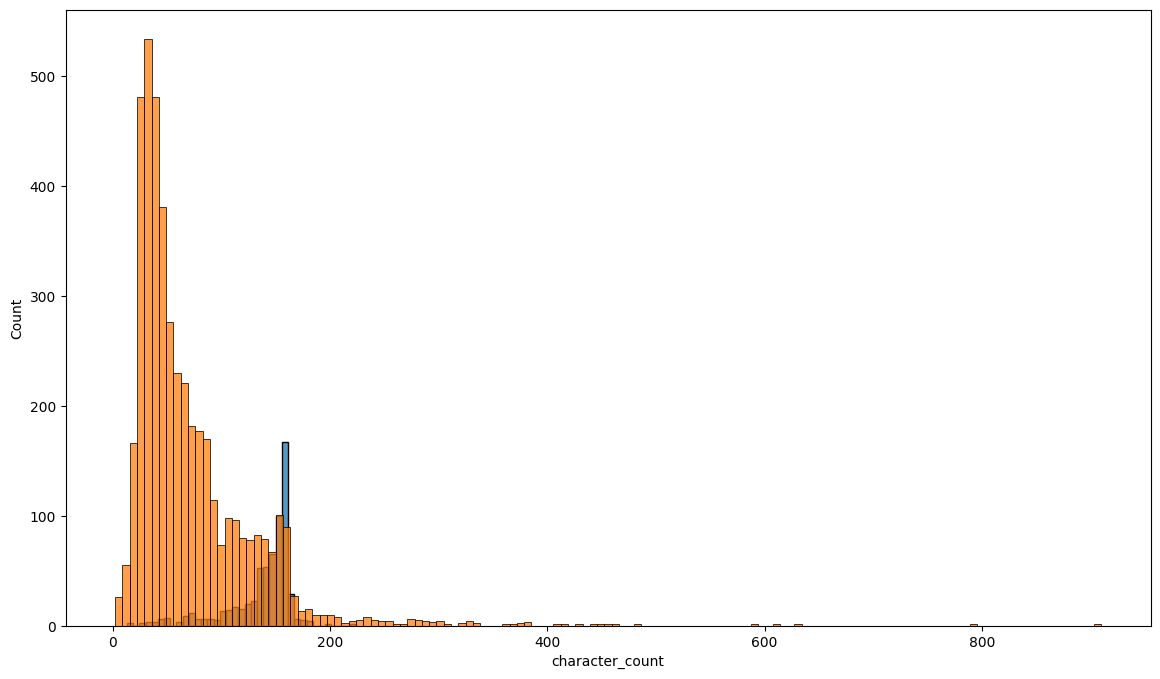

In [183]:
plt.figure(figsize=(14, 8))
sns.histplot(df[df['Category'] == 0]['character_count'])
sns.histplot(df[df['Category'] == 1]['character_count'])

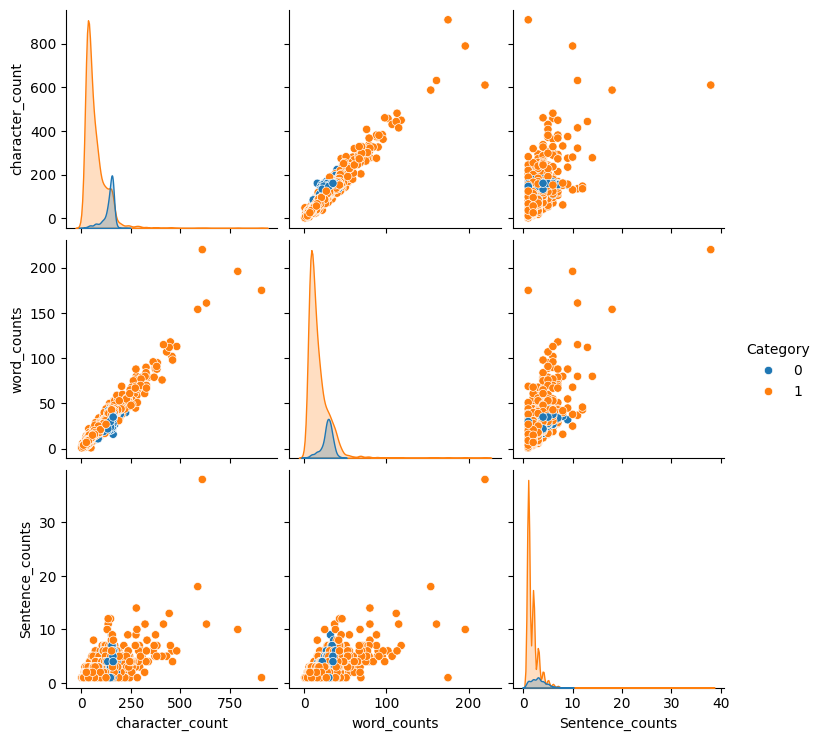

In [184]:
sns.pairplot(df, hue='Category')

<Axes: >

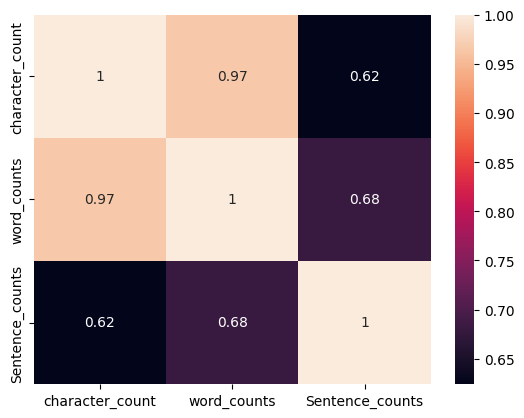

In [185]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Preprocessing and Feature Engineering

## Feature Engineering Steps:

1. **Lower case** - Converting all text to lower case for uniformity.
2. **Tokenization** - Splitting text into individual words or tokens.
3. **Removing special characters** - Eliminating characters that do not contribute to meaning.
4. **Removing stop words and punctuation** - Filtering out common words and punctuation that do not add significant meaning.
5. **Stemming** - Reducing words to their root form to standardize them.
them.

In [186]:
# importing libraries of NLP
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
import string

In [187]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)


    ps = PorterStemmer()

    # removing special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    # removing stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    # stemming
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    
        
    
        

In [188]:
df['Message'][3]

'U dun say so early hor... U c already then say...'

In [189]:
transform_text("U dun say so early hor... U c already then say...")

'u dun say earli hor u c alreadi say'

In [190]:
df['Transform_text'] = df['Message'].apply(transform_text)

In [191]:
df.head(5)

,Category,Message,character_count,word_counts,Sentence_counts,Transform_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [236]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [237]:
X = tfidf.fit_transform(df['Transform_text']).toarray()

In [238]:
X.shape

(5169, 3000)

In [239]:
y=df['Category'].values

In [247]:
# Ensure there are no null values
if pd.isnull(y).any():
    print("Null values found in target variable 'Category'")
    y = pd.Series(y).fillna(0).astype(int)
else:
    y = y.astype(int)

y

array([1, 1, 0, ..., 1, 1, 1])

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [249]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [250]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [251]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))

0.8694390715667312


In [252]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.9709864603481625


In [253]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.9835589941972921


In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### Classificastion model Training and Evaluation

In [256]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [257]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [258]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    return accuracy

In [259]:
train_classifier(svc,X_train,y_train,X_test,y_test)

0.9758220502901354

In [260]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.9758220502901354
For  KN
Accuracy -  0.9052224371373307
For  NB
Accuracy -  0.9709864603481625
For  DT
Accuracy -  0.9303675048355899
For  LR
Accuracy -  0.9584139264990329
For  RF
Accuracy -  0.97678916827853
For  AdaBoost
Accuracy -  0.960348162475822
For  BgC
Accuracy -  0.9584139264990329
For  ETC
Accuracy -  0.9748549323017408
For  GBDT
Accuracy -  0.9468085106382979
For  xgb
Accuracy -  0.9671179883945842


In [261]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)

In [262]:
performance_df

,Algorithm,Accuracy
5,RF,0.976789
0,SVC,0.975822
8,ETC,0.974855
2,NB,0.970986
10,xgb,0.967118
6,AdaBoost,0.960348
4,LR,0.958414
7,BgC,0.958414
9,GBDT,0.946809
3,DT,0.930368
